<a href="https://colab.research.google.com/github/canasep/mack_projeto1/blob/main/codes/PROJETO_APLICADO_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

link collab to github

In [ ]:

!git clone https://github.com/canasep/mack_projeto1.git


Cloning into 'mack_projeto1'...
remote: Enumerating objects: 216, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 216 (delta 34), reused 2 (delta 2), pack-reused 147 (from 1)
Receiving objects: 100% (216/216), 1.86 MiB | 11.96 MiB/s, done.
Resolving deltas: 100% (86/86), done.


create dataset with csv

In [ ]:
import pandas as pd

file_path = '/content/mack_projeto1/dataset/arquivos/RAW.csv'

try:
  df = pd.read_csv(file_path)
  print("Dataset created successfully!")
except FileNotFoundError:
  print(f"Error: File not found at {file_path}")
except Exception as e:
  print(f"An error occurred: {e}")




Dataset created successfully!


show dataset

In [ ]:
df.head()


,loja,tipo,Shopping,software,data_assinado,data_entregue,data_primeiro_pedido,Irregular,pedidos_m0,pedidos_m1,pedidos_m2
0,Loja - 01,Lanches,Não,ANOTA,09/07/2024,19/08/2024,03/10/2024,NaN,2,0,0
1,Loja - 02,Hamburgueria / Hot Dog,Não,ANOTA,09/07/2024,18/07/2024,14/08/2024,NaN,101,251,187
2,Loja - 03,Hamburgueria / Hot Dog,Não,ANOTA,09/07/2024,18/07/2024,28/08/2024,NaN,16,71,113
3,Loja - 04,Hamburgueria / Hot Dog,Não,ANOTA,10/07/2024,23/08/2024,20/09/2024,NaN,10,18,19
4,Loja - 05,Hamburgueria / Hot Dog,Não,ANOTA,12/07/2024,27/07/2024,29/08/2024,NaN,20,112,85


In [ ]:
import matplotlib.pyplot as md


df['pedidos_m0'].mean()
df.describe()


,pedidos_m0,pedidos_m1,pedidos_m2
count,481.000000,481.000000,481.000000
mean,57.862786,80.887734,53.632017
std,132.328922,205.875114,185.986972
min,1.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000
50%,12.000000,12.000000,0.000000
75%,50.000000,70.000000,23.000000
max,1832.000000,2838.000000,2659.000000


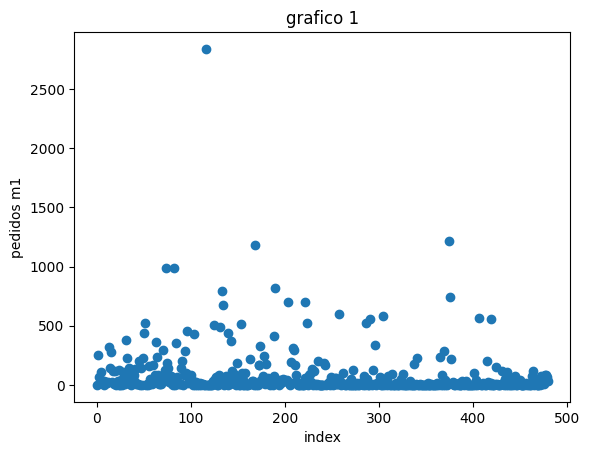

In [ ]:
md.scatter(df.index, df['pedidos_m1'])
md.title('grafico 1')
md.xlabel('index')
md.ylabel('pedidos m1')
md.show()

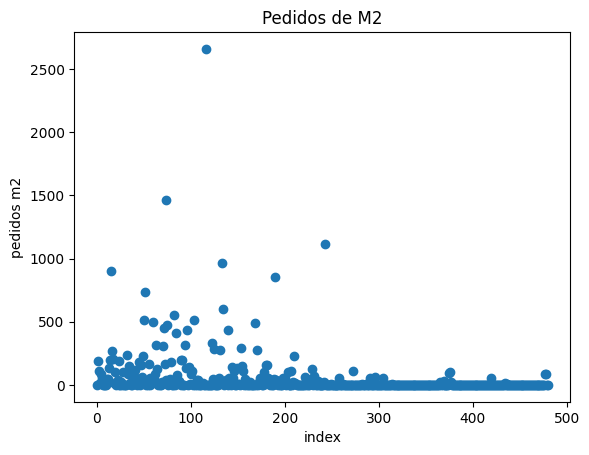

In [ ]:
md.scatter(df.index, df['pedidos_m2'])
md.title('Pedidos de M2')
md.xlabel('index')
md.ylabel('pedidos m2')
md.show()

#Convertendo as datas para padronizar o formato (limpeza e padronização)


In [ ]:
#Convertendo as datas para padronizar o formato (limpeza e padronização)
df['data_primeiro_pedido'] = pd.to_datetime(df['data_primeiro_pedido'], format='%d/%m/%Y')
df['data_entregue'] = pd.to_datetime(df['data_entregue'], format='%d/%m/%Y')
df['data_assinado'] = pd.to_datetime(df['data_assinado'], format='%d/%m/%Y')

In [ ]:
janeiro_df = df[(df['data_primeiro_pedido'].dt.year == 2025)&(df['data_primeiro_pedido'].dt.month.isin([ 1, 2]))]
print(janeiro_df.shape[0], "restaurantes ativados em janeiro ou fevereiro de 2025") #quantos restaurantes fizeram o primeiro pedido em janeiro
m2validos_df = df[(df['data_primeiro_pedido'].dt.year == 2024)&(df['data_primeiro_pedido'].dt.month.isin([ 5, 6, 7, 8, 9, 10, 11, 12]))]
print(m2validos_df.shape[0], "restaurantes ativados até dezembro de 2024")
print(df.shape[0], "restaurantes no total")

228 restaurantes ativados em janeiro ou fevereiro de 2025
253 restaurantes ativados até dezembro de 2024
481 restaurantes no total


Restaurantes com média de pedidos menor que 10

In [9]:
M2_e_M1_menor_10 = m2validos_df[(m2validos_df['pedidos_m1'] < 10) & (m2validos_df['pedidos_m2'] < 10)]
print(M2_e_M1_menor_10.shape[0], "restaurantes com pedidos em M1 e M2 menores que 10")

63 restaurantes com pedidos em M1 e M2 menores que 10


A quantidade de pedidos aumenta ou diminui com o tempo de uso do Totem?

In [10]:
m2validos_e_ativos = m2validos_df[~m2validos_df.index.isin(M2_e_M1_menor_10.index)] #aqui pegando o DF de restaurantes que fizeram o pedido anterior a janeiro e que tem
M2_em_alta = m2validos_e_ativos[m2validos_e_ativos['pedidos_m2'] >= m2validos_e_ativos['pedidos_m1']] #criar os M2 em alta descartando os inativos ou ativados recentemente
print(M2_em_alta.shape[0], "restaurantes com M2 maior ou igual a M1 (excluindo os de baixa operação e recentemente implantados)")
M2_em_queda = m2validos_e_ativos[    m2validos_e_ativos['pedidos_m2'] < m2validos_e_ativos['pedidos_m1']] #criar os M2 em alta descartando os inativos ou ativados recentemente
print(M2_em_queda.shape[0], "restaurantes com M2 menor que M1 (excluindo os de baixa operação e recentemente implantados)")

76 restaurantes com M2 maior ou igual a M1 (excluindo os de baixa operação e recentemente implantados)
114 restaurantes com M2 menor que M1 (excluindo os de baixa operação e recentemente implantados)


Cálculo do tempo de ativação do Totem

In [11]:
m2validos_df['Tempo de Ativação'] = (m2validos_df['data_primeiro_pedido'] - m2validos_df['data_assinado']).dt.days #criando o indicador te tempo de ativação
print(m2validos_df[['loja', 'data_assinado', 'data_primeiro_pedido', 'Tempo de Ativação']].head(10))

        loja data_assinado data_primeiro_pedido  Tempo de Ativação
0  Loja - 01    2024-07-09           2024-10-03                 86
1  Loja - 02    2024-07-09           2024-08-14                 36
2  Loja - 03    2024-07-09           2024-08-28                 50
3  Loja - 04    2024-07-10           2024-09-20                 72
4  Loja - 05    2024-07-12           2024-08-29                 48
5  Loja - 06    2024-07-12           2024-09-06                 56
6  Loja - 07    2024-07-12           2024-07-29                 17
7  Loja - 08    2024-07-12           2024-08-09                 28
8  Loja - 09    2024-07-12           2024-07-25                 13
9  Loja - 10    2024-07-17           2024-08-28                 42


<ipython-input-11-5d9cc0da86c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m2validos_df['Tempo de Ativação'] = (m2validos_df['data_primeiro_pedido'] - m2validos_df['data_assinado']).dt.days #criando o indicador te tempo de ativação


Total de pedidos em M1 e M2 com restauntes ativados até Dez/24

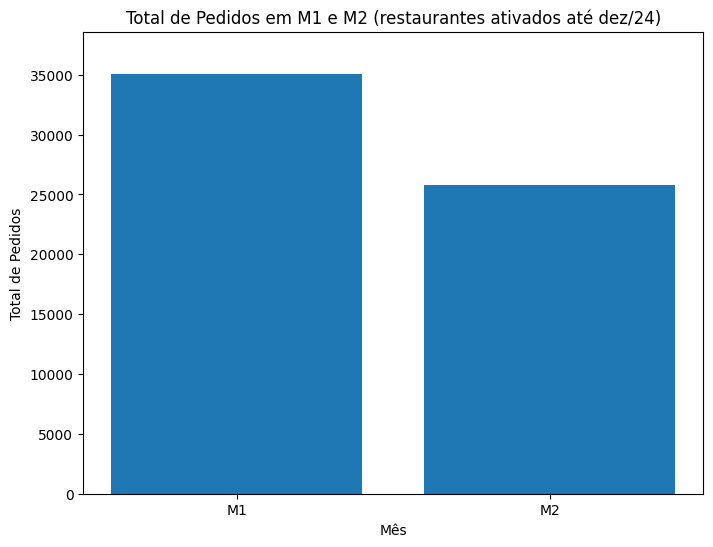

In [12]:
import matplotlib.pyplot as plt

# 1. Calcular o total de pedidos para M1 e M2 no m2validos_df
total_m1 = m2validos_df['pedidos_m1'].sum()
total_m2 = m2validos_df['pedidos_m2'].sum()

# 2. Criar o gráfico de barras
plt.figure(figsize=(8, 6))

# Dados para o gráfico
meses = ['M1', 'M2']
totais = [total_m1, total_m2]

plt.bar(meses, totais, width=0.8)

# 3. Customizações do gráfico
plt.title('Total de Pedidos em M1 e M2 (restaurantes ativados até dez/24)')
plt.xlabel('Mês')
plt.ylabel('Total de Pedidos')
plt.ylim(0, max(totais)*1.1)

# 4. Exibir o gráfico
plt.show()